# Turtle Rescue Forecast Challenge


* Link:
[Turtle Rescue Forecast Challenge](https://zindi.africa/competitions/turtle-rescue-forecast-challenge/data)

* Objective: The objective of this challenge is to forecast the number of turtles caught per week per capture site. This will help Local Ocean plan their staff schedules and budget.

| Variable             | Description                                                                                                                                               |
|----------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------|
| Rescue_ID            | It’s an individual bycatch incidence identity number. The numbers are consecutive, for each year e.g. 2018_RE_0732 means rescue number 732 in year 2018 | 
| Date_TimeCaught      | Date the turtle is captured e.g. 06/01/ |2018                                                                                                                |
| Researcher           | Name of bycatch officer(s) involved with specific rescue                                                                                                   |
| Capture Site         | Area where turtle was captured, as reported by the fisher.                                                                                                 |
| Foraging Ground      | General area of ocean area where turtle was captured. The assumption is that the turtle was foraging where it was captured.                               |
| Capture Method       | Fishing gear or method used by fishers to capture the turtle                                                                                               |
| Fisher               | Name of the fisher who captured the turtle                                                                                                                 |
| Landing_Site         | Section of beach where turtle is landed.                                                                                                                  |
| Species              | Species of turtle (e.g. green turtle, hawksbill, loggerhead etc.)                                                                                          |
| Tag_1                | Individual / unique number used to identify a turtle. Each turtle that is captured is tagged.                                                            |
| Tag_2                | Second tag added to large turtles. Turtles with two tags: tag 1 is an odd number e.g. KEL0169 and tag 2 is even and consequent e.g. KEL0170                |
| Lost_Tags            | Replaced tags. If a turtle has outgrown its tag, the tag is removed and replaced with a bigger one, with a different number                              |
| T_Number             | It a number given to a turtle that has been taken to the rehabilitation facility (TRC) for treatment.                                                    |
| CCL_cm               | Central Carapace Length (Biometric measurement). Measured in centimetres                                                                                  |
| CCW_cm               | Central Carapace Width (Biometric measurement). Measured in centimetres                                                                                    |
| Weight_Kg            | (Biometric measurement). Measured in Kgs                                                                                                                   |
| Sex                  | Gender of the turtle.                                                                                                                                     |
| Turtle Characteristics | Description of turtles (mostly unusual occurrences e.g. disease, injury, parasites etc. Usually as short textual description                               |
| Status               | Indicates whether the turtle is released or admitted to TRC                                                                                                |
| Release Site         | Site where the turtle is released                                                                                                                          |
| Date_Release         | Date turtle is released                                                                                                                                    |
| Release_Admiss_Notes | Additional information about release                                                                                                                      |
| SpecialRemarks       | Additional info (General) about turtle                                                                                                                     |


# Load dataset and Import

Terminal: 
'make setup'

In [212]:
#!pip install ydata_profiling
#!pip install missingno

In [213]:
#!pip freeze > requirements.txt

In [214]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

from ydata_profiling import ProfileReport

import missingno as msno



In [215]:
#! pip install ydata-profiling --upgrade

## Table 1: capturesite_category

In [216]:
# Turtles dataset - CaptureSite_category.csv
df_capturesite_category = pd.read_csv('./data/CaptureSite_category.csv')
df_capturesite_category.head()

,CaptureSite,CaptureSiteCategory,Type
0,CaptureSite_0,CaptureSiteCategory_2,Type_1
1,CaptureSite_1,CaptureSiteCategory_2,Type_1
2,CaptureSite_10,CaptureSiteCategory_2,Type_1
3,CaptureSite_11,CaptureSiteCategory_0,Type_0
4,CaptureSite_12,CaptureSiteCategory_2,Type_1


In [217]:
df_capturesite_category.shape

(29, 3)

In [218]:
# Different categories of CaptureSite
df_capturesite_category['CaptureSite'].unique()


array(['CaptureSite_0', 'CaptureSite_1', 'CaptureSite_10',
       'CaptureSite_11', 'CaptureSite_12', 'CaptureSite_13',
       'CaptureSite_14', 'CaptureSite_15', 'CaptureSite_16',
       'CaptureSite_17', 'CaptureSite_18', 'CaptureSite_19',
       'CaptureSite_2', 'CaptureSite_20', 'CaptureSite_21',
       'CaptureSite_22', 'CaptureSite_23', 'CaptureSite_24',
       'CaptureSite_25', 'CaptureSite_26', 'CaptureSite_27',
       'CaptureSite_28', 'CaptureSite_3', 'CaptureSite_4',
       'CaptureSite_5', 'CaptureSite_6', 'CaptureSite_7', 'CaptureSite_8',
       'CaptureSite_9'], dtype=object)

In [219]:
print('Classification of CaptureSite categories: ', len(df_capturesite_category['CaptureSite'].unique()))


Classification of CaptureSite categories:  29


In [220]:
df_capturesite_category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   CaptureSite          29 non-null     object
 1   CaptureSiteCategory  29 non-null     object
 2   Type                 29 non-null     object
dtypes: object(3)
memory usage: 828.0+ bytes


## Table 2: sample

In [221]:
# Turtles dataset - Sample_sub.csv
df_sample_sub = pd.read_csv('./data/Sample_sub.csv')
df_sample_sub.head()

,ID,Capture_Number
0,CaptureSite_0_201901,7
1,CaptureSite_0_201902,1
2,CaptureSite_0_201903,5
3,CaptureSite_0_201904,2
4,CaptureSite_0_201905,3


In [222]:
df_sample_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1276 entries, 0 to 1275
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              1276 non-null   object
 1   Capture_Number  1276 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 20.1+ KB


## Table 3: train

In [223]:
# Turtles dataset - train.csv
df_train = pd.read_csv('./data/train.csv')
df_train.head()

,Rescue_ID,Date_TimeCaught,Researcher,CaptureSite,ForagingGround,CaptureMethod,Fisher,LandingSite,Species,Tag_1,...,Lost_Tags,T_Number,CCL_cm,CCW_cm,Weight_Kg,Sex,TurtleCharacteristics,Status,ReleaseSite,Date_TimeRelease
0,2000_RE_0060,2000-12-22,Researcher_25,CaptureSite_0,Ocean,Net,Fisher_1072,LandingSite_CaptureSiteCategory_2,Species_6,CC00147,...,NaN,NaN,64.70,62.60,NaN,Unknown,algae at rear of shell,Released,ReleaseSite_50,22/12/00
1,2001_RE_0187,2001-10-28,Researcher_6,CaptureSite_0,Ocean,Net,Fisher_520,LandingSite_CaptureSiteCategory_2,Species_6,W442,...,NaN,NaN,35.85,31.35,NaN,Unknown,multiple b's on front flippers& a lot of alga...,Released,ReleaseSite_62,28/10/01
2,2001_RE_0197,2001-11-01,Researcher_6,CaptureSite_0,Ocean,Net,Fisher_1669,LandingSite_CaptureSiteCategory_2,Species_5,KE0376,...,NaN,NaN,51.80,49.20,NaN,Unknown,clean,Released,ReleaseSite_50,01/11/01
3,2002_RE_0031,2002-03-11,Researcher_32,CaptureSite_0,Ocean,Net,Fisher_1798,LandingSite_CaptureSiteCategory_2,Species_6,CC00302,...,NaN,NaN,60.50,59.00,NaN,Unknown,1 b 3 CS+ calcerous algae at rear end of shell...,Released,ReleaseSite_50,11/03/02
4,2002_RE_0118,2002-08-08,Researcher_25,CaptureSite_0,Ocean,Beached,Fisher_1918,LandingSite_CaptureSiteCategory_2,Species_5,NotTagged_0113,...,NaN,NaN,34.70,33.00,NaN,Unknown,very lively+ right eye is hanging out + swolle...,Released,ReleaseSite_62,08/08/02


In [224]:
df_train.tail()

,Rescue_ID,Date_TimeCaught,Researcher,CaptureSite,ForagingGround,CaptureMethod,Fisher,LandingSite,Species,Tag_1,...,Lost_Tags,T_Number,CCL_cm,CCW_cm,Weight_Kg,Sex,TurtleCharacteristics,Status,ReleaseSite,Date_TimeRelease
18057,2018_RE_1511,2018-12-18,Researcher_30,CaptureSite_9,Ocean,Net,Fisher_569,LandingSite_CaptureSiteCategory_1,Species_5,KES1828,...,NaN,NaN,57.13,50.57,21.09,Unknown,White calcareous algae on carapace,Released,ReleaseSite_68,18/12/18
18058,2018_RE_1514,2018-12-18,Researcher_30,CaptureSite_9,Ocean,Net,Fisher_125,LandingSite_CaptureSiteCategory_1,Species_6,KES0563,...,KES0416,NaN,42.07,38.37,9.02,Unknown,Calcareous + green algae on carapace\nBarnacle...,Released,ReleaseSite_68,18/12/18
18059,2018_RE_1532,2018-12-24,Researcher_30,CaptureSite_9,Ocean,Net,Fisher_1343,LandingSite_CaptureSiteCategory_1,Species_5,KES1833,...,NaN,NaN,57.20,52.30,NaN,Unknown,Clean turtle,Released,ReleaseSite_68,24/12/18
18060,2018_RE_1533,2018-12-24,Researcher_30,CaptureSite_9,Ocean,Net,Fisher_1551,LandingSite_CaptureSiteCategory_1,Species_5,KES1831,...,NaN,NaN,51.90,48.50,NaN,Unknown,Green algae on carapace\ntip of left supra mis...,Released,ReleaseSite_68,24/12/18
18061,2018_RE_1550,2018-12-28,Researcher_30,CaptureSite_9,Ocean,Net,Fisher_1551,LandingSite_CaptureSiteCategory_1,Species_6,KES1432,...,NaN,NaN,34.60,31.20,4.29,Unknown,Thick pink patches of calcareous algae on cara...,Released,ReleaseSite_37,28/12/18


In [225]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18062 entries, 0 to 18061
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rescue_ID              18062 non-null  object 
 1   Date_TimeCaught        18062 non-null  object 
 2   Researcher             18062 non-null  object 
 3   CaptureSite            18062 non-null  object 
 4   ForagingGround         18062 non-null  object 
 5   CaptureMethod          18062 non-null  object 
 6   Fisher                 18062 non-null  object 
 7   LandingSite            18062 non-null  object 
 8   Species                18062 non-null  object 
 9   Tag_1                  17937 non-null  object 
 10  Tag_2                  4911 non-null   object 
 11  Lost_Tags              925 non-null    object 
 12  T_Number               38 non-null     object 
 13  CCL_cm                 18038 non-null  float64
 14  CCW_cm                 18035 non-null  float64
 15  We

# Preprocessing

In [226]:
# Merge table df_train and df_capturesite_categoryn on 'CaptureSite'

df_train = pd.merge(df_train, df_capturesite_category, on='CaptureSite', how='left')
df_train.head()

,Rescue_ID,Date_TimeCaught,Researcher,CaptureSite,ForagingGround,CaptureMethod,Fisher,LandingSite,Species,Tag_1,...,CCL_cm,CCW_cm,Weight_Kg,Sex,TurtleCharacteristics,Status,ReleaseSite,Date_TimeRelease,CaptureSiteCategory,Type
0,2000_RE_0060,2000-12-22,Researcher_25,CaptureSite_0,Ocean,Net,Fisher_1072,LandingSite_CaptureSiteCategory_2,Species_6,CC00147,...,64.70,62.60,NaN,Unknown,algae at rear of shell,Released,ReleaseSite_50,22/12/00,CaptureSiteCategory_2,Type_1
1,2001_RE_0187,2001-10-28,Researcher_6,CaptureSite_0,Ocean,Net,Fisher_520,LandingSite_CaptureSiteCategory_2,Species_6,W442,...,35.85,31.35,NaN,Unknown,multiple b's on front flippers& a lot of alga...,Released,ReleaseSite_62,28/10/01,CaptureSiteCategory_2,Type_1
2,2001_RE_0197,2001-11-01,Researcher_6,CaptureSite_0,Ocean,Net,Fisher_1669,LandingSite_CaptureSiteCategory_2,Species_5,KE0376,...,51.80,49.20,NaN,Unknown,clean,Released,ReleaseSite_50,01/11/01,CaptureSiteCategory_2,Type_1
3,2002_RE_0031,2002-03-11,Researcher_32,CaptureSite_0,Ocean,Net,Fisher_1798,LandingSite_CaptureSiteCategory_2,Species_6,CC00302,...,60.50,59.00,NaN,Unknown,1 b 3 CS+ calcerous algae at rear end of shell...,Released,ReleaseSite_50,11/03/02,CaptureSiteCategory_2,Type_1
4,2002_RE_0118,2002-08-08,Researcher_25,CaptureSite_0,Ocean,Beached,Fisher_1918,LandingSite_CaptureSiteCategory_2,Species_5,NotTagged_0113,...,34.70,33.00,NaN,Unknown,very lively+ right eye is hanging out + swolle...,Released,ReleaseSite_62,08/08/02,CaptureSiteCategory_2,Type_1


<Axes: >

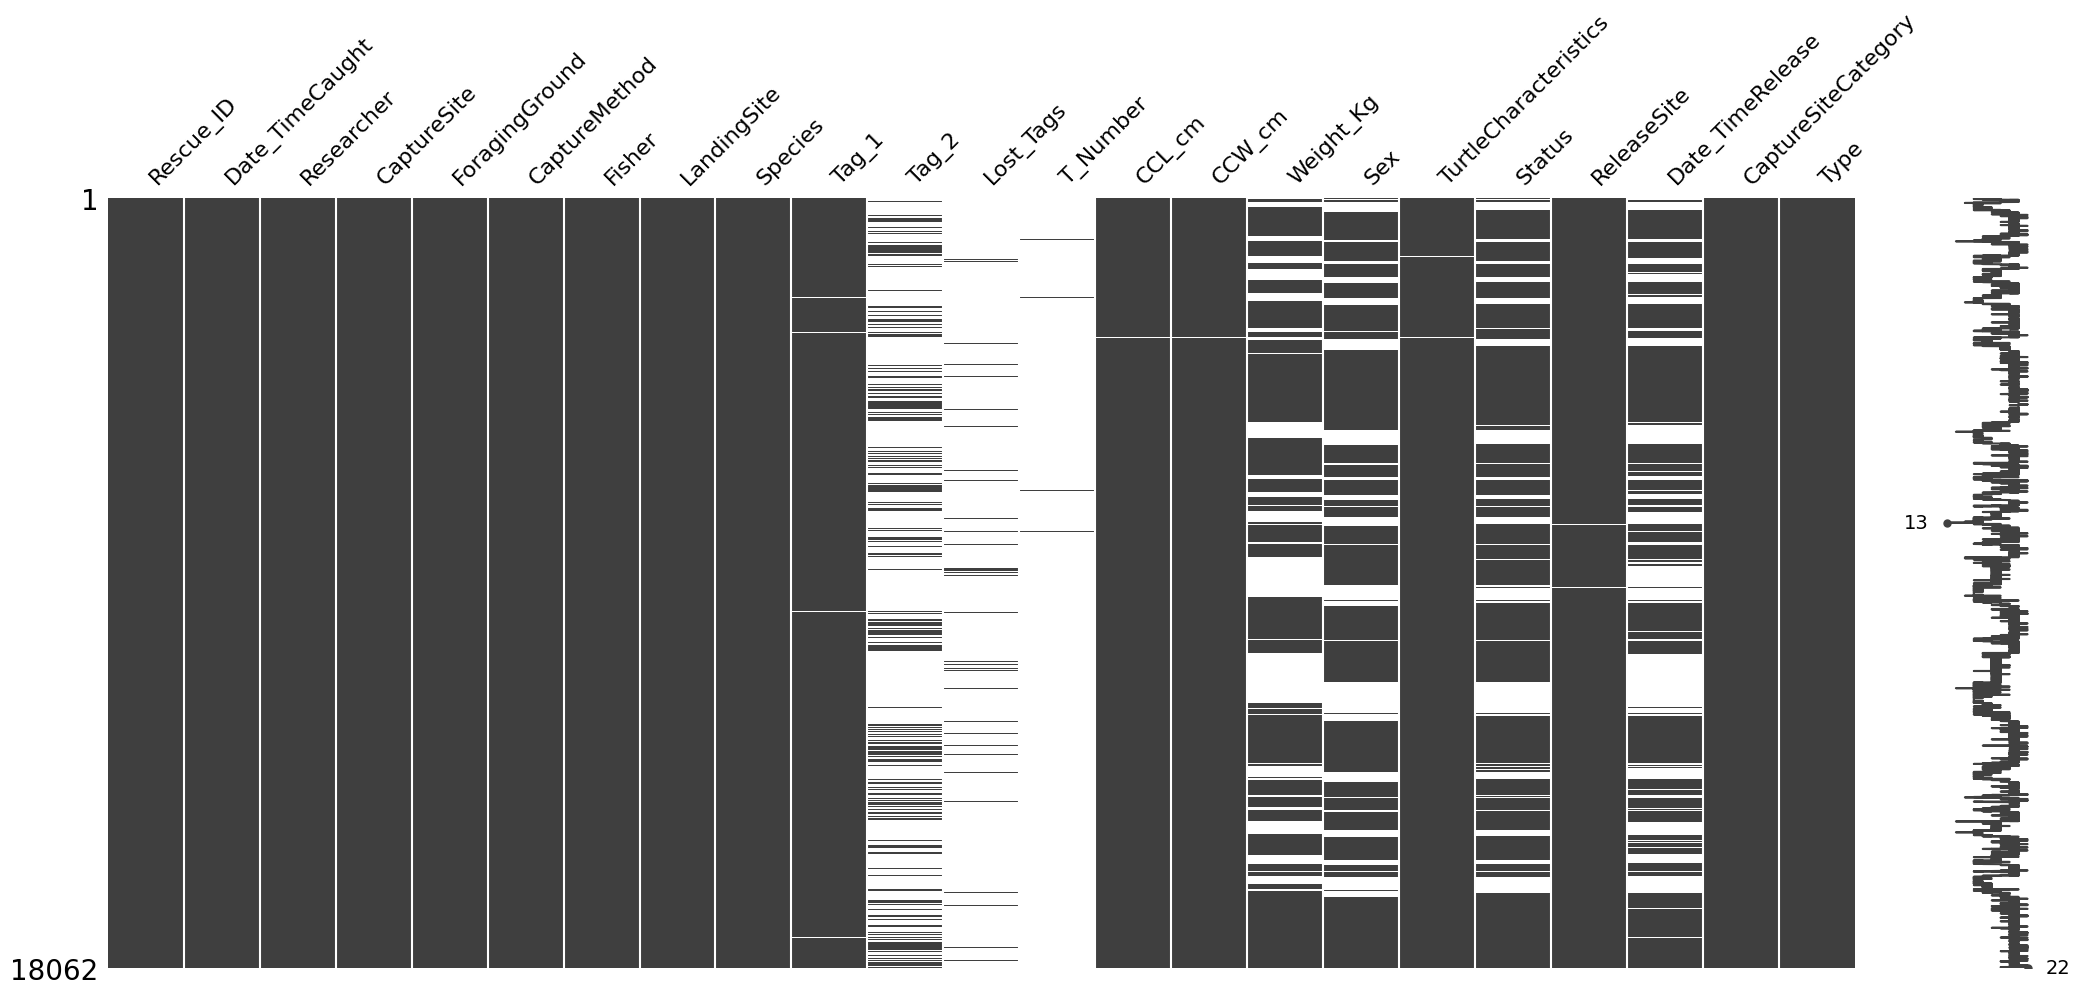

In [227]:
msno.matrix(df_train)

## Dropping columns with too many missing values: t_number, tag2, lost_tags

In [228]:
# Drop columns 'CaptureSite' and 'CaptureSite_category'
df_train = df_train.drop(['T_Number', 'Lost_Tags', 'Tag_2'], axis=1)
df_train.head()

,Rescue_ID,Date_TimeCaught,Researcher,CaptureSite,ForagingGround,CaptureMethod,Fisher,LandingSite,Species,Tag_1,CCL_cm,CCW_cm,Weight_Kg,Sex,TurtleCharacteristics,Status,ReleaseSite,Date_TimeRelease,CaptureSiteCategory,Type
0,2000_RE_0060,2000-12-22,Researcher_25,CaptureSite_0,Ocean,Net,Fisher_1072,LandingSite_CaptureSiteCategory_2,Species_6,CC00147,64.70,62.60,NaN,Unknown,algae at rear of shell,Released,ReleaseSite_50,22/12/00,CaptureSiteCategory_2,Type_1
1,2001_RE_0187,2001-10-28,Researcher_6,CaptureSite_0,Ocean,Net,Fisher_520,LandingSite_CaptureSiteCategory_2,Species_6,W442,35.85,31.35,NaN,Unknown,multiple b's on front flippers& a lot of alga...,Released,ReleaseSite_62,28/10/01,CaptureSiteCategory_2,Type_1
2,2001_RE_0197,2001-11-01,Researcher_6,CaptureSite_0,Ocean,Net,Fisher_1669,LandingSite_CaptureSiteCategory_2,Species_5,KE0376,51.80,49.20,NaN,Unknown,clean,Released,ReleaseSite_50,01/11/01,CaptureSiteCategory_2,Type_1
3,2002_RE_0031,2002-03-11,Researcher_32,CaptureSite_0,Ocean,Net,Fisher_1798,LandingSite_CaptureSiteCategory_2,Species_6,CC00302,60.50,59.00,NaN,Unknown,1 b 3 CS+ calcerous algae at rear end of shell...,Released,ReleaseSite_50,11/03/02,CaptureSiteCategory_2,Type_1
4,2002_RE_0118,2002-08-08,Researcher_25,CaptureSite_0,Ocean,Beached,Fisher_1918,LandingSite_CaptureSiteCategory_2,Species_5,NotTagged_0113,34.70,33.00,NaN,Unknown,very lively+ right eye is hanging out + swolle...,Released,ReleaseSite_62,08/08/02,CaptureSiteCategory_2,Type_1


## Transform date to datetime format

In [229]:
# Transform 'Date_TimeCaught' column to datetime format
df_train['Date_TimeCaught'] = pd.to_datetime(df_train['Date_TimeCaught'])

#create new columns for year and week of year, year_woy (year and week of year combined)
df_train["year"]=df_train.Date_TimeCaught.dt.year
df_train["week_of_year"]=df_train.Date_TimeCaught.dt.isocalendar().week
df_train["year_woy"]=df_train.year*100+df_train.week_of_year

df_train.head()

,Rescue_ID,Date_TimeCaught,Researcher,CaptureSite,ForagingGround,CaptureMethod,Fisher,LandingSite,Species,Tag_1,...,Sex,TurtleCharacteristics,Status,ReleaseSite,Date_TimeRelease,CaptureSiteCategory,Type,year,week_of_year,year_woy
0,2000_RE_0060,2000-12-22,Researcher_25,CaptureSite_0,Ocean,Net,Fisher_1072,LandingSite_CaptureSiteCategory_2,Species_6,CC00147,...,Unknown,algae at rear of shell,Released,ReleaseSite_50,22/12/00,CaptureSiteCategory_2,Type_1,2000,51,200051
1,2001_RE_0187,2001-10-28,Researcher_6,CaptureSite_0,Ocean,Net,Fisher_520,LandingSite_CaptureSiteCategory_2,Species_6,W442,...,Unknown,multiple b's on front flippers& a lot of alga...,Released,ReleaseSite_62,28/10/01,CaptureSiteCategory_2,Type_1,2001,43,200143
2,2001_RE_0197,2001-11-01,Researcher_6,CaptureSite_0,Ocean,Net,Fisher_1669,LandingSite_CaptureSiteCategory_2,Species_5,KE0376,...,Unknown,clean,Released,ReleaseSite_50,01/11/01,CaptureSiteCategory_2,Type_1,2001,44,200144
3,2002_RE_0031,2002-03-11,Researcher_32,CaptureSite_0,Ocean,Net,Fisher_1798,LandingSite_CaptureSiteCategory_2,Species_6,CC00302,...,Unknown,1 b 3 CS+ calcerous algae at rear end of shell...,Released,ReleaseSite_50,11/03/02,CaptureSiteCategory_2,Type_1,2002,11,200211
4,2002_RE_0118,2002-08-08,Researcher_25,CaptureSite_0,Ocean,Beached,Fisher_1918,LandingSite_CaptureSiteCategory_2,Species_5,NotTagged_0113,...,Unknown,very lively+ right eye is hanging out + swolle...,Released,ReleaseSite_62,08/08/02,CaptureSiteCategory_2,Type_1,2002,32,200232


In [230]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18062 entries, 0 to 18061
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rescue_ID              18062 non-null  object        
 1   Date_TimeCaught        18062 non-null  datetime64[ns]
 2   Researcher             18062 non-null  object        
 3   CaptureSite            18062 non-null  object        
 4   ForagingGround         18062 non-null  object        
 5   CaptureMethod          18062 non-null  object        
 6   Fisher                 18062 non-null  object        
 7   LandingSite            18062 non-null  object        
 8   Species                18062 non-null  object        
 9   Tag_1                  17937 non-null  object        
 10  CCL_cm                 18038 non-null  float64       
 11  CCW_cm                 18035 non-null  float64       
 12  Weight_Kg              12653 non-null  float64       
 13  S

## separate srtings_numbers ??

## Group by week and capturesite

In [231]:
# groupby year/ capture site  
df_train.groupby(['year_woy', 'CaptureSite'])
df_train.head()

,Rescue_ID,Date_TimeCaught,Researcher,CaptureSite,ForagingGround,CaptureMethod,Fisher,LandingSite,Species,Tag_1,...,Sex,TurtleCharacteristics,Status,ReleaseSite,Date_TimeRelease,CaptureSiteCategory,Type,year,week_of_year,year_woy
0,2000_RE_0060,2000-12-22,Researcher_25,CaptureSite_0,Ocean,Net,Fisher_1072,LandingSite_CaptureSiteCategory_2,Species_6,CC00147,...,Unknown,algae at rear of shell,Released,ReleaseSite_50,22/12/00,CaptureSiteCategory_2,Type_1,2000,51,200051
1,2001_RE_0187,2001-10-28,Researcher_6,CaptureSite_0,Ocean,Net,Fisher_520,LandingSite_CaptureSiteCategory_2,Species_6,W442,...,Unknown,multiple b's on front flippers& a lot of alga...,Released,ReleaseSite_62,28/10/01,CaptureSiteCategory_2,Type_1,2001,43,200143
2,2001_RE_0197,2001-11-01,Researcher_6,CaptureSite_0,Ocean,Net,Fisher_1669,LandingSite_CaptureSiteCategory_2,Species_5,KE0376,...,Unknown,clean,Released,ReleaseSite_50,01/11/01,CaptureSiteCategory_2,Type_1,2001,44,200144
3,2002_RE_0031,2002-03-11,Researcher_32,CaptureSite_0,Ocean,Net,Fisher_1798,LandingSite_CaptureSiteCategory_2,Species_6,CC00302,...,Unknown,1 b 3 CS+ calcerous algae at rear end of shell...,Released,ReleaseSite_50,11/03/02,CaptureSiteCategory_2,Type_1,2002,11,200211
4,2002_RE_0118,2002-08-08,Researcher_25,CaptureSite_0,Ocean,Beached,Fisher_1918,LandingSite_CaptureSiteCategory_2,Species_5,NotTagged_0113,...,Unknown,very lively+ right eye is hanging out + swolle...,Released,ReleaseSite_62,08/08/02,CaptureSiteCategory_2,Type_1,2002,32,200232


# Counting Number_Turtles and merging tables

In [232]:
# Grouping and counting
Target=df_train.groupby(["year_woy","CaptureSite"]).CaptureSite.count().rename("Number_Turtles").reset_index()

df_train.head()


,Rescue_ID,Date_TimeCaught,Researcher,CaptureSite,ForagingGround,CaptureMethod,Fisher,LandingSite,Species,Tag_1,...,Sex,TurtleCharacteristics,Status,ReleaseSite,Date_TimeRelease,CaptureSiteCategory,Type,year,week_of_year,year_woy
0,2000_RE_0060,2000-12-22,Researcher_25,CaptureSite_0,Ocean,Net,Fisher_1072,LandingSite_CaptureSiteCategory_2,Species_6,CC00147,...,Unknown,algae at rear of shell,Released,ReleaseSite_50,22/12/00,CaptureSiteCategory_2,Type_1,2000,51,200051
1,2001_RE_0187,2001-10-28,Researcher_6,CaptureSite_0,Ocean,Net,Fisher_520,LandingSite_CaptureSiteCategory_2,Species_6,W442,...,Unknown,multiple b's on front flippers& a lot of alga...,Released,ReleaseSite_62,28/10/01,CaptureSiteCategory_2,Type_1,2001,43,200143
2,2001_RE_0197,2001-11-01,Researcher_6,CaptureSite_0,Ocean,Net,Fisher_1669,LandingSite_CaptureSiteCategory_2,Species_5,KE0376,...,Unknown,clean,Released,ReleaseSite_50,01/11/01,CaptureSiteCategory_2,Type_1,2001,44,200144
3,2002_RE_0031,2002-03-11,Researcher_32,CaptureSite_0,Ocean,Net,Fisher_1798,LandingSite_CaptureSiteCategory_2,Species_6,CC00302,...,Unknown,1 b 3 CS+ calcerous algae at rear end of shell...,Released,ReleaseSite_50,11/03/02,CaptureSiteCategory_2,Type_1,2002,11,200211
4,2002_RE_0118,2002-08-08,Researcher_25,CaptureSite_0,Ocean,Beached,Fisher_1918,LandingSite_CaptureSiteCategory_2,Species_5,NotTagged_0113,...,Unknown,very lively+ right eye is hanging out + swolle...,Released,ReleaseSite_62,08/08/02,CaptureSiteCategory_2,Type_1,2002,32,200232


In [233]:
Target.head()

,year_woy,CaptureSite,Number_Turtles
0,199816,CaptureSite_27,1
1,199828,CaptureSite_11,1
2,199832,CaptureSite_11,1
3,199832,CaptureSite_27,1
4,199839,CaptureSite_11,2


In [234]:
# Merge table df_train and df_capturesite_categoryn on 'CaptureSite'

df_train_final = pd.merge(df_train, Target, on=['year_woy', 'CaptureSite'], how='left')
df_train_final.head()

,Rescue_ID,Date_TimeCaught,Researcher,CaptureSite,ForagingGround,CaptureMethod,Fisher,LandingSite,Species,Tag_1,...,TurtleCharacteristics,Status,ReleaseSite,Date_TimeRelease,CaptureSiteCategory,Type,year,week_of_year,year_woy,Number_Turtles
0,2000_RE_0060,2000-12-22,Researcher_25,CaptureSite_0,Ocean,Net,Fisher_1072,LandingSite_CaptureSiteCategory_2,Species_6,CC00147,...,algae at rear of shell,Released,ReleaseSite_50,22/12/00,CaptureSiteCategory_2,Type_1,2000,51,200051,1
1,2001_RE_0187,2001-10-28,Researcher_6,CaptureSite_0,Ocean,Net,Fisher_520,LandingSite_CaptureSiteCategory_2,Species_6,W442,...,multiple b's on front flippers& a lot of alga...,Released,ReleaseSite_62,28/10/01,CaptureSiteCategory_2,Type_1,2001,43,200143,1
2,2001_RE_0197,2001-11-01,Researcher_6,CaptureSite_0,Ocean,Net,Fisher_1669,LandingSite_CaptureSiteCategory_2,Species_5,KE0376,...,clean,Released,ReleaseSite_50,01/11/01,CaptureSiteCategory_2,Type_1,2001,44,200144,1
3,2002_RE_0031,2002-03-11,Researcher_32,CaptureSite_0,Ocean,Net,Fisher_1798,LandingSite_CaptureSiteCategory_2,Species_6,CC00302,...,1 b 3 CS+ calcerous algae at rear end of shell...,Released,ReleaseSite_50,11/03/02,CaptureSiteCategory_2,Type_1,2002,11,200211,1
4,2002_RE_0118,2002-08-08,Researcher_25,CaptureSite_0,Ocean,Beached,Fisher_1918,LandingSite_CaptureSiteCategory_2,Species_5,NotTagged_0113,...,very lively+ right eye is hanging out + swolle...,Released,ReleaseSite_62,08/08/02,CaptureSiteCategory_2,Type_1,2002,32,200232,2


In [235]:
df_train_final.columns

Index(['Rescue_ID', 'Date_TimeCaught', 'Researcher', 'CaptureSite',
       'ForagingGround', 'CaptureMethod', 'Fisher', 'LandingSite', 'Species',
       'Tag_1', 'CCL_cm', 'CCW_cm', 'Weight_Kg', 'Sex',
       'TurtleCharacteristics', 'Status', 'ReleaseSite', 'Date_TimeRelease',
       'CaptureSiteCategory', 'Type', 'year', 'week_of_year', 'year_woy',
       'Number_Turtles'],
      dtype='object')

In [236]:
df_train_final.shape

(18062, 24)

<Axes: >

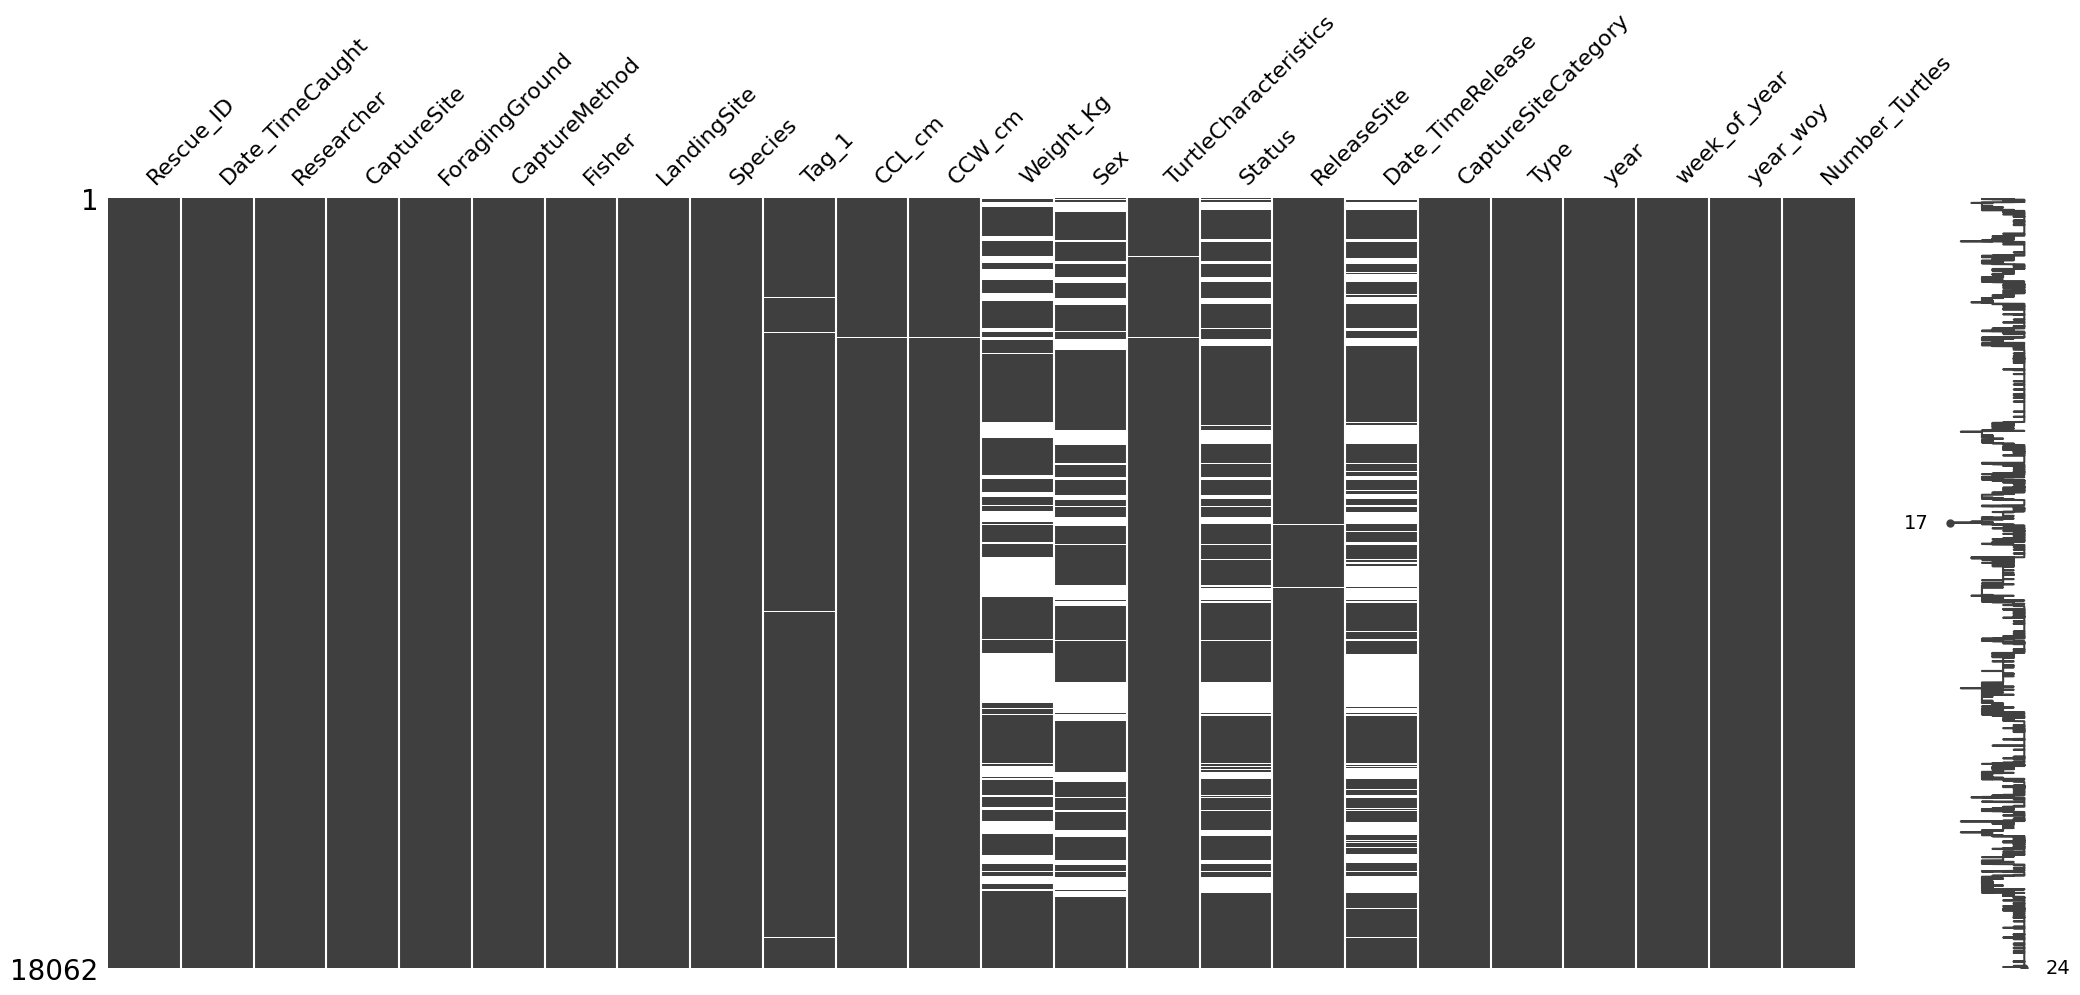

In [237]:
msno.matrix(df_train_final)

# Defining target and features for the model

In [238]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.dummy import DummyClassifier

from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [239]:
# Getting non-numerical features
features_not_numerical = [ 'Date_TimeCaught', 'CaptureSite',
       'ForagingGround', 'CaptureMethod', 'LandingSite', 'Species', 'Sex',
       'Status', 'CaptureSiteCategory', 'Type', 'year', 'week_of_year', 'year_woy']

If you want to drop other columns, dont forget to change features_not_numerical

In [240]:
# Dropping features: 'Rescue_ID', 'Researcher', 'Fisher','Tag_1','TurtleCharacteristics', 'ReleaseSite', 'Date_TimeRelease' 
#df_train_final = df_train_final.drop(['Rescue_ID', 'Researcher', 'Fisher','Tag_1','TurtleCharacteristics', 'ReleaseSite', 'Date_TimeRelease'], axis=1)


In [241]:
# Define features and target
X = df_train_final.drop(['Number_Turtles'], axis=1)

y = df_train_final['Number_Turtles']

In [242]:
X.shape

(18062, 23)

In [243]:
y.shape

(18062,)

# Visualization

In [244]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt



In [245]:
# Create a new DataFrame by concatenating X and y
new_df = pd.concat([X, y], axis=1)

In [246]:
new_df.head()

,Rescue_ID,Date_TimeCaught,Researcher,CaptureSite,ForagingGround,CaptureMethod,Fisher,LandingSite,Species,Tag_1,...,TurtleCharacteristics,Status,ReleaseSite,Date_TimeRelease,CaptureSiteCategory,Type,year,week_of_year,year_woy,Number_Turtles
0,2000_RE_0060,2000-12-22,Researcher_25,CaptureSite_0,Ocean,Net,Fisher_1072,LandingSite_CaptureSiteCategory_2,Species_6,CC00147,...,algae at rear of shell,Released,ReleaseSite_50,22/12/00,CaptureSiteCategory_2,Type_1,2000,51,200051,1
1,2001_RE_0187,2001-10-28,Researcher_6,CaptureSite_0,Ocean,Net,Fisher_520,LandingSite_CaptureSiteCategory_2,Species_6,W442,...,multiple b's on front flippers& a lot of alga...,Released,ReleaseSite_62,28/10/01,CaptureSiteCategory_2,Type_1,2001,43,200143,1
2,2001_RE_0197,2001-11-01,Researcher_6,CaptureSite_0,Ocean,Net,Fisher_1669,LandingSite_CaptureSiteCategory_2,Species_5,KE0376,...,clean,Released,ReleaseSite_50,01/11/01,CaptureSiteCategory_2,Type_1,2001,44,200144,1
3,2002_RE_0031,2002-03-11,Researcher_32,CaptureSite_0,Ocean,Net,Fisher_1798,LandingSite_CaptureSiteCategory_2,Species_6,CC00302,...,1 b 3 CS+ calcerous algae at rear end of shell...,Released,ReleaseSite_50,11/03/02,CaptureSiteCategory_2,Type_1,2002,11,200211,1
4,2002_RE_0118,2002-08-08,Researcher_25,CaptureSite_0,Ocean,Beached,Fisher_1918,LandingSite_CaptureSiteCategory_2,Species_5,NotTagged_0113,...,very lively+ right eye is hanging out + swolle...,Released,ReleaseSite_62,08/08/02,CaptureSiteCategory_2,Type_1,2002,32,200232,2


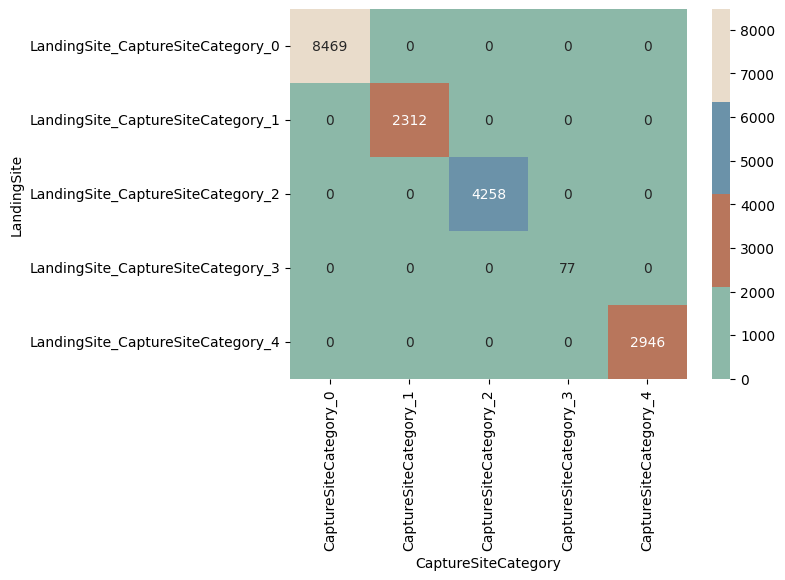

In [329]:

# Correlation LandingSite and CaptureSiteCategory
contingency_table = pd.crosstab(new_df['LandingSite'], new_df['CaptureSiteCategory'])

# Define your custom color palette
custom_palette = ['#8cb8a8', '#b8765c', '#6b92a9', '#e9dccb']

# Create a heatmap using your custom color palette
sns.heatmap(contingency_table, cmap=custom_palette, annot=True, fmt="d")

# Add labels
plt.xlabel('CaptureSiteCategory')
plt.ylabel('LandingSite')

# Show the plot
plt.show()


## Number of turtles vs. year

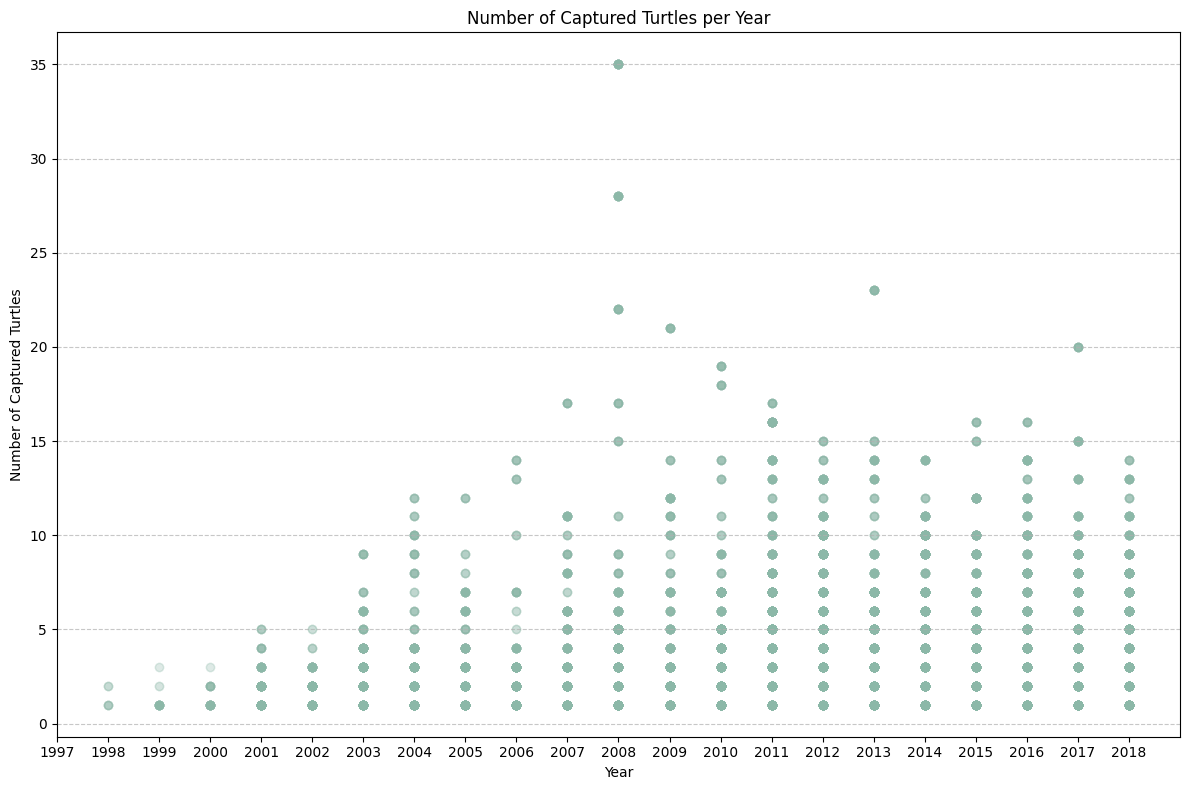

In [247]:
# Define custom color palette
custom_colors = ['#8cb8a8', '#b8765c', '#6b92a9', '#e9dccb']

# Cast the 'year' column to integers
years = new_df['year'].astype(int)
turtle_counts = new_df['Number_Turtles']

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(12, 8))
plt.scatter(years, turtle_counts, marker='o', alpha=0.1, color=custom_colors[0])  # Set the color here
plt.title('Number of Captured Turtles per Year')
plt.xlabel('Year')
plt.ylabel('Number of Captured Turtles')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Set the x-axis ticks to be integers
plt.xticks(range(1997, 2019))

plt.show()


## Capture site vs. number of turtles caught 

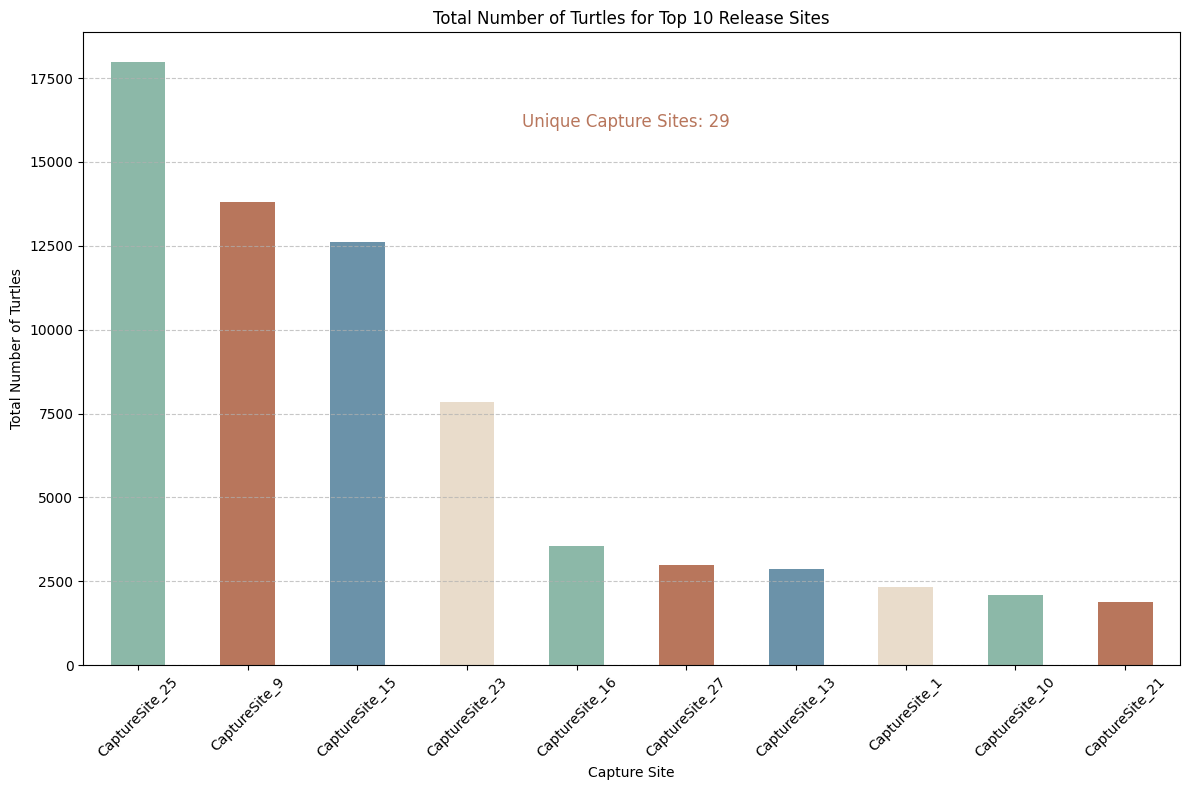

In [248]:
# Define custom color palette
custom_colors = ['#8cb8a8', '#b8765c', '#6b92a9', '#e9dccb']

# Count the total number of unique capture sites
unique_capture_sites = new_df['CaptureSite'].nunique()

# Group the data by 'ReleaseSite' and calculate the total number of turtles for each release site
release_site_counts = new_df.groupby('CaptureSite')['Number_Turtles'].sum()

# Sort the release sites by total number of turtles in descending order and select the top N
top_n = 10  # change this number to show the top N release sites
top_release_sites = release_site_counts.sort_values(ascending=False).head(top_n)

# Create a bar plot to visualize the number of turtles for each release site
plt.figure(figsize=(12, 8))
top_release_sites.plot(kind='bar', color=custom_colors)
plt.title(f'Total Number of Turtles for Top {top_n} Release Sites')
plt.xlabel('Capture Site')
plt.ylabel('Total Number of Turtles')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Add annotation for the total number of unique capture sites with custom color
plt.annotate(f'Unique Capture Sites: {unique_capture_sites}', xy=(0.4, 0.85), xycoords='axes fraction', fontsize=12, color=custom_colors[1])

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



## Number of turtles vs. sex

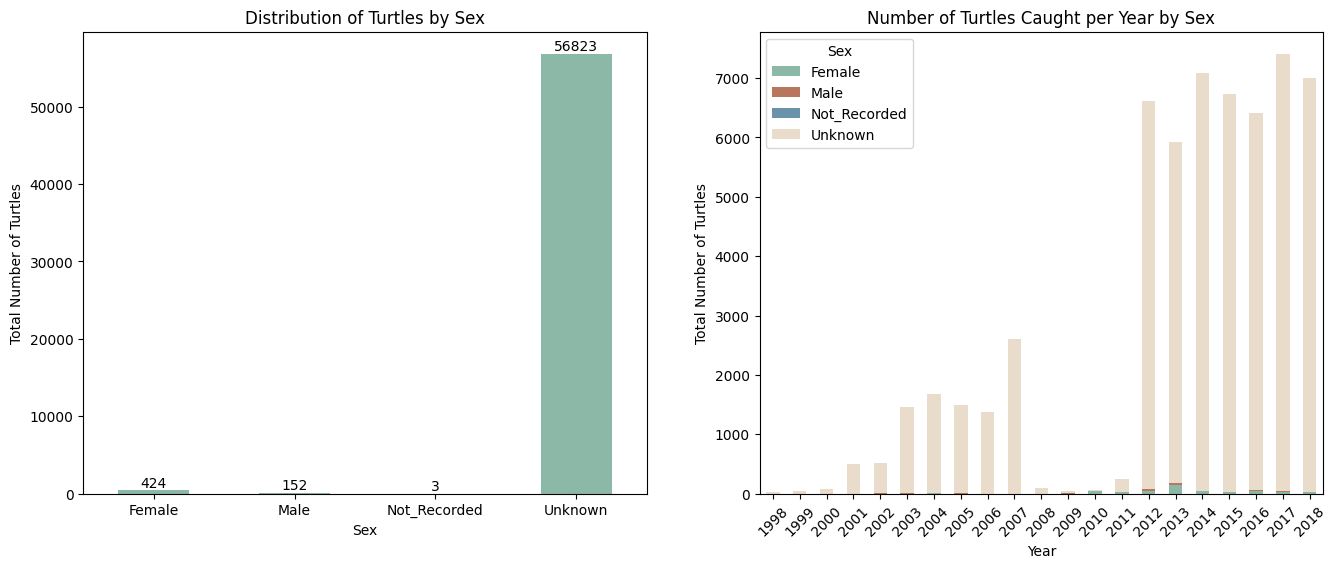

In [249]:
# Define custom color palette
custom_colors = ['#8cb8a8', '#b8765c', '#6b92a9', '#e9dccb']

# Create a figure with two subplots side-by-side
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Plot the first graph on the left subplot
axs[0].set_title('Distribution of Turtles by Sex')
total_turtle_counts = new_df.groupby('Sex')['Number_Turtles'].sum()
total_turtle_counts.plot(kind='bar', color=custom_colors[0], ax=axs[0])
axs[0].set_xlabel('Sex')
axs[0].set_ylabel('Total Number of Turtles')
axs[0].set_xticklabels(total_turtle_counts.index, rotation=0)

# Add labels to the bars
for i, v in enumerate(total_turtle_counts):
    axs[0].text(i, v + 50, str(v), ha='center', va='bottom')

# Plot the second graph on the right subplot
axs[1].set_title('Number of Turtles Caught per Year by Sex')
yearly_sex_counts = new_df.groupby(['year', 'Sex'])['Number_Turtles'].sum().unstack()
yearly_sex_counts.plot(kind='bar', stacked=True, colormap='coolwarm', ax=axs[1], color=custom_colors[0:])
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Total Number of Turtles')
axs[1].set_xticklabels(yearly_sex_counts.index, rotation=45)
axs[1].legend(title='Sex')



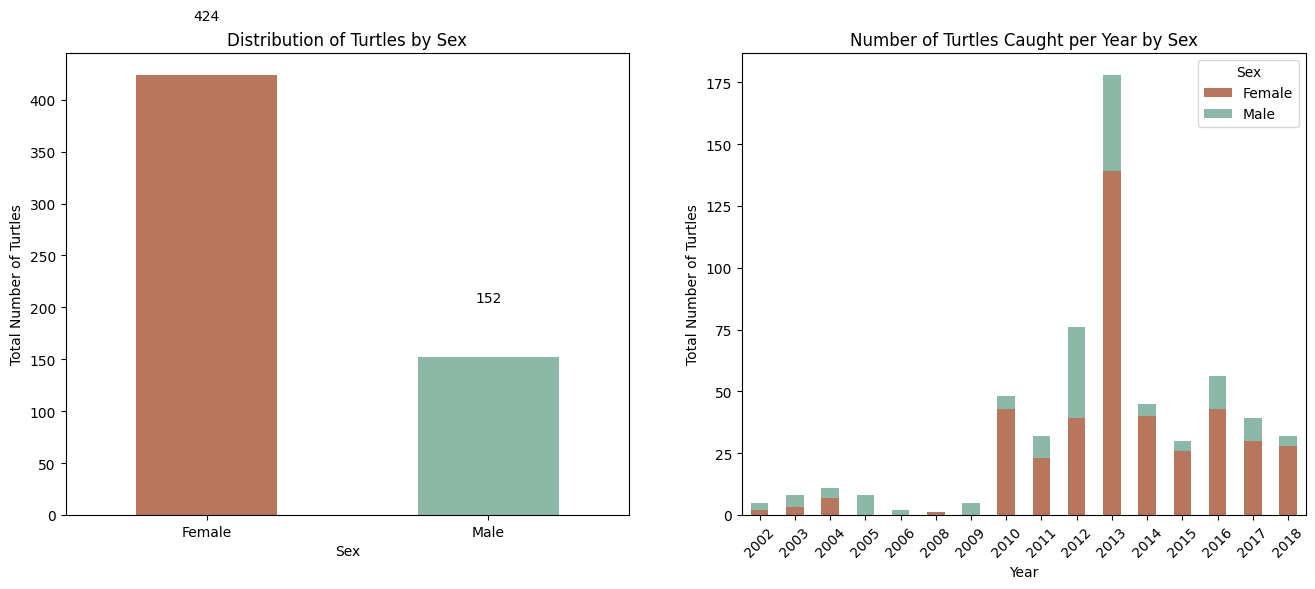

In [331]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the DataFrame to include only 'Male' and 'Female' genders
filtered_df = new_df[new_df['Sex'].isin(['Male', 'Female'])]

# Define custom color palette
custom_colors = ['#8cb8a8', '#b8765c', '#6b92a9', '#e9dccb']

# Create a figure with two subplots side-by-side
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Manually set the colors for 'Male' and 'Female'
sex_colors = {'Male': custom_colors[0], 'Female': custom_colors[1]}

# Plot the first graph on the left subplot
axs[0].set_title('Distribution of Turtles by Sex')
total_turtle_counts = filtered_df.groupby('Sex')['Number_Turtles'].sum()
total_turtle_counts.plot(kind='bar', color=[sex_colors[sex] for sex in total_turtle_counts.index], ax=axs[0])
axs[0].set_xlabel('Sex')
axs[0].set_ylabel('Total Number of Turtles')
axs[0].set_xticklabels(total_turtle_counts.index, rotation=0)

# Add labels to the bars
for i, v in enumerate(total_turtle_counts):
    axs[0].text(i, v + 50, str(v), ha='center', va='bottom')

# Plot the second graph on the right subplot
axs[1].set_title('Number of Turtles Caught per Year by Sex')
yearly_sex_counts = filtered_df.groupby(['year', 'Sex'])['Number_Turtles'].sum().unstack()
yearly_sex_counts.plot(kind='bar', stacked=True, colormap='coolwarm', ax=axs[1], color=[sex_colors[sex] for sex in yearly_sex_counts.columns])
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Total Number of Turtles')
axs[1].set_xticklabels(yearly_sex_counts.index, rotation=45)
axs[1].legend(title='Sex')

# Show the plots
plt.show()


# make a plot only with male and female

CHATGPT: In Kenya

| Season            | Approximate Dates        | Months (as Numbers) | Conventional Season   |
|-------------------|--------------------------|---------------------|-----------------------|
| Long Rains        | March to May             | 3, 4, 5             | Spring                |
| Short Rains       | October to December      | 10, 11, 12          | Summer                |
| Major Dry Season  | June to September        | 6, 7, 8, 9           | Winter                |
| Minor Dry Season  | January to February      | 1, 2                | Autumn                |




## Number of turtles vs. year seasons

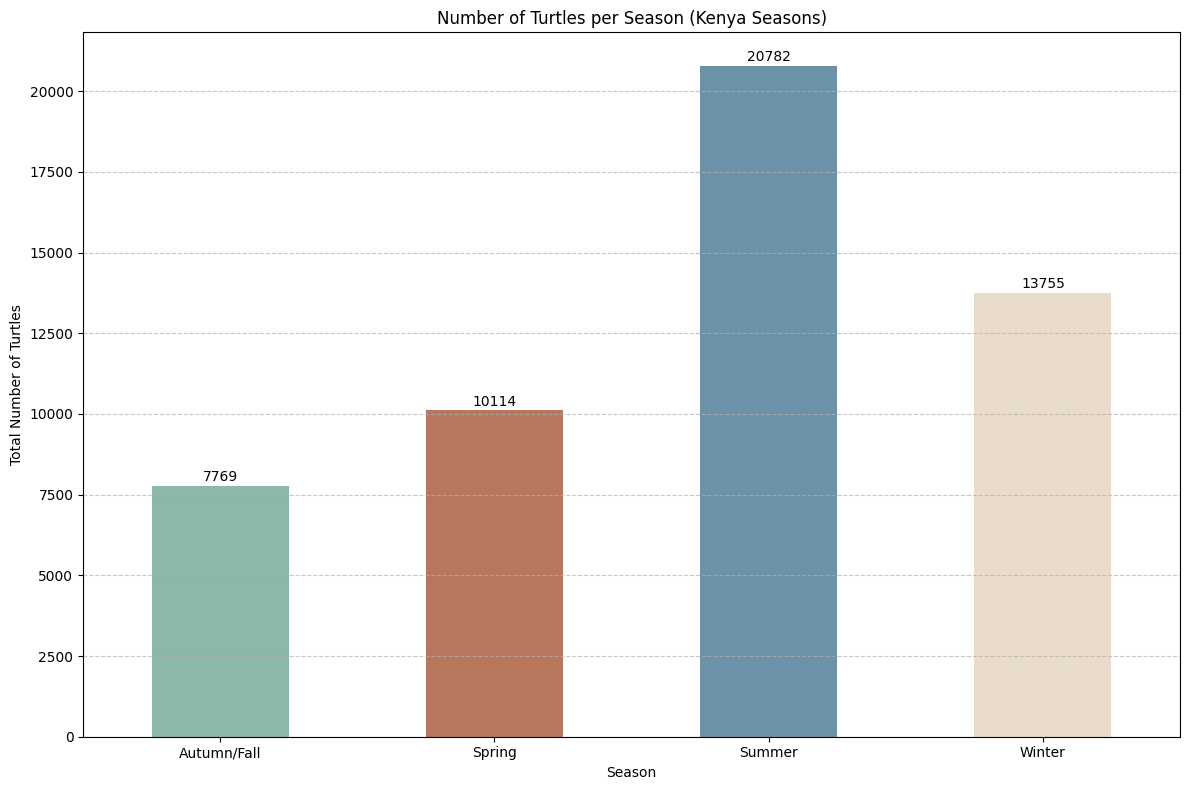

In [250]:
# Define custom color palette
custom_colors = ['#8cb8a8', '#b8765c', '#6b92a9', '#e9dccb']

# Define the seasons based on Kenya seasons
seasons = {
    'Autumn/Fall': [1, 2],
    'Winter': [6, 7, 8, 9],
    'Spring': [3, 4, 5],
    'Summer': [10, 11, 12]
}

# Create a function to determine the season for each year and week_of_year
def get_season(year, week_of_year):
    for season, months in seasons.items():
        if (week_of_year >= min(months) * 4) and (week_of_year <= max(months) * 4):
            return season

# Apply the get_season function to create a new 'Season' column
new_df['Season'] = new_df.apply(lambda row: get_season(row['year'], row['week_of_year']), axis=1)

# Group the data by season and calculate the total number of turtles for each season
seasonly_turtle_counts = new_df.groupby('Season')['Number_Turtles'].sum()

# Create a bar plot to visualize the number of turtles per season
plt.figure(figsize=(12, 8))
seasonly_turtle_counts.plot(kind='bar', color=custom_colors)
plt.title('Number of Turtles per Season (Kenya Seasons)')
plt.xlabel('Season')
plt.ylabel('Total Number of Turtles')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal

plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add labels to the bars
for i, v in enumerate(seasonly_turtle_counts):
    plt.text(i, v + 50, str(v), ha='center', va='bottom')

plt.tight_layout()

# Show the plot
plt.show()




## 

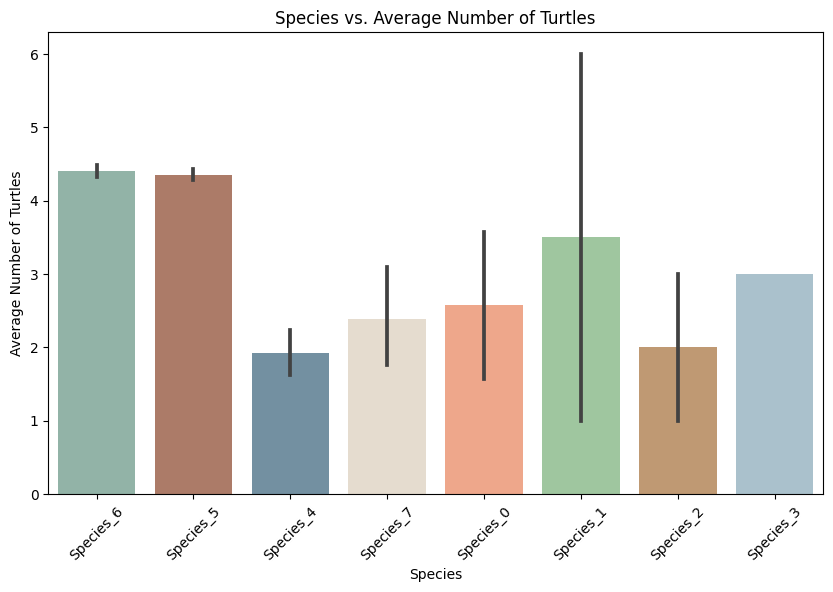

In [303]:
# Define custom color palette 
custom_colors = ['#8cb8a8', '#b8765c', '#6b92a9', '#e9dccb', '#ffa07a', '#99cc99', '#cc9966', '#a4c3d2']

# Create a bar plot of species vs. average number of turtles for each species
plt.figure(figsize=(10, 6))
sns.barplot(data=new_df, x='Species', y='Number_Turtles', palette=custom_colors)
plt.title('Species vs. Average Number of Turtles')
plt.xlabel('Species')
plt.ylabel('Average Number of Turtles')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


## Numeric features 

## Correlation

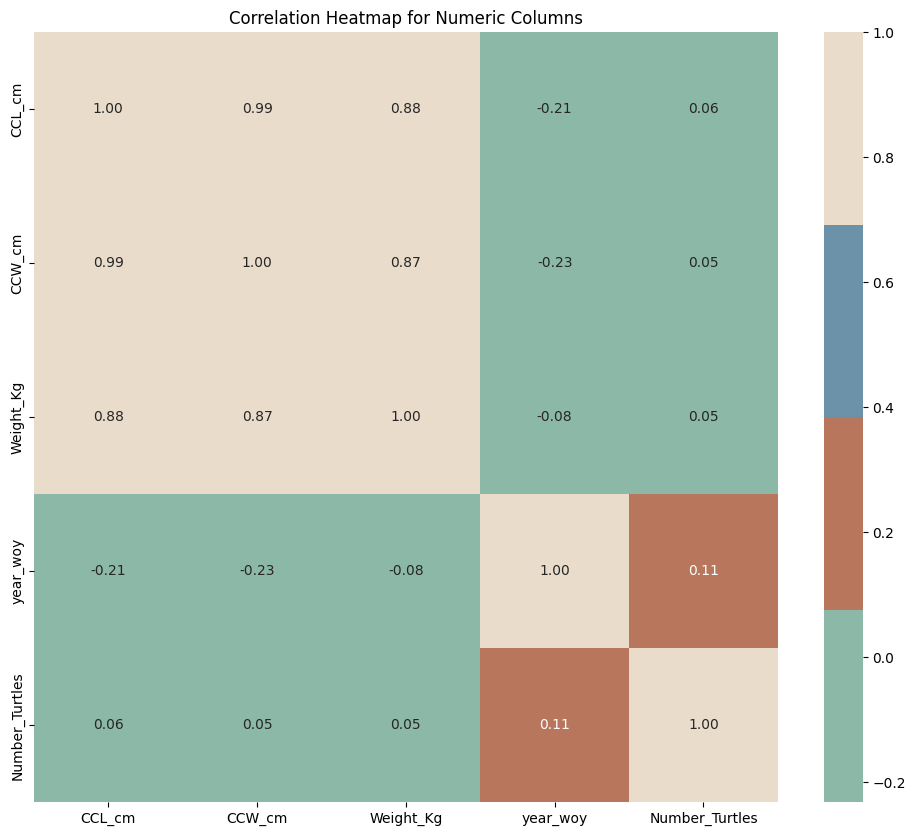

In [285]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_columns = new_df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Define your custom color palette
custom_colors = ['#8cb8a8', '#b8765c', '#6b92a9', '#e9dccb']

# Create a heatmap of the correlation matrix with custom color palette
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap=custom_colors, fmt=".2f")
plt.title('Correlation Heatmap for Numeric Columns')
plt.show()


## Relationship between the numerical columns and the target - pairplot

"CCL_cm","Central Carapace Length (Biometric measurement). Measured in centimetres"
"CCW_cm","Central Carapace Width (Biometric measurement). Measured in centimetres"
"Weight_Kg","(Biometric measurement). Measured in Kgs"

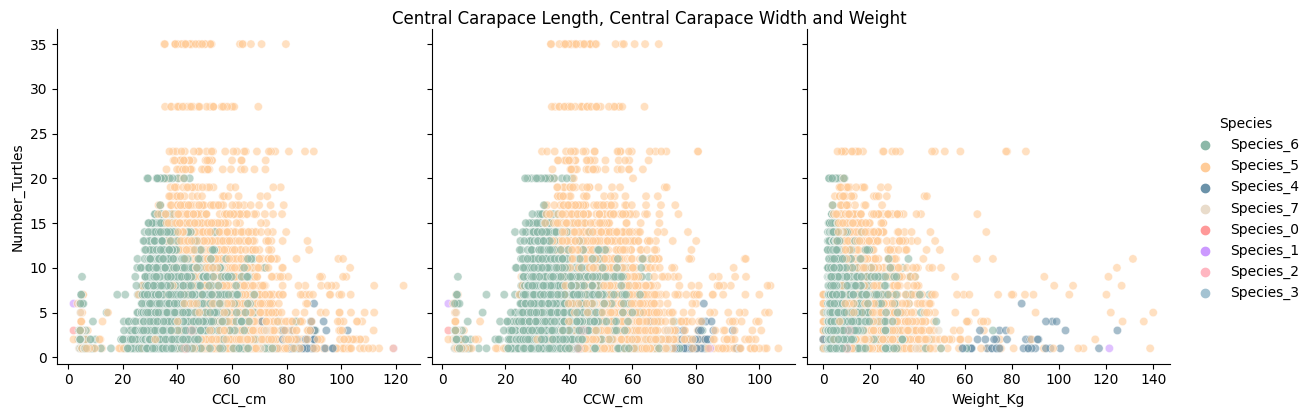

In [253]:
# Define your custom color palette with 8 different colors
custom_colors = ['#8cb8a8', '#ffcc99', '#6b92a9', '#e9dccb', '#ff9999', '#cc99ff', '#ffb6c1', '#a4c3d2' ]

# Create pair plots to visualize how the numerical columns affect the target
pair_plot = sns.pairplot(new_df, x_vars=numeric_columns, y_vars=target_column, kind='scatter', height=4, hue='Species', palette=custom_colors, plot_kws={'alpha': 0.6})

# Customize the scatter plot for 'Species 2'
pair_plot.map_offdiag(lambda x, y, **kwargs: plt.scatter(x, y, alpha=0.2, **kwargs) if new_df['Species'].iloc[x.index[0]] == 'Species_2' else None)

plt.suptitle('Central Carapace Length, Central Carapace Width and Weight', y=1.02)
plt.show()


